# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Dhava Ade Pratama
- Email:dhavaadepratama23@gmail.com
- Id Dicoding:DHAVA ADE PRATAMA

## Persiapan

#####Business Understanding

Jaya Jaya Institute yang merupakan institusi pendidikan memiliki permasalahan mengenai para siswanya tidak menyelesaikan pendidikannya/DropOut

Tujuan dari proyek ini adalah untuk mengidentifikasi Siswa Siswa mana saja yang berkemungkinan akan melakukan dropout, sehingga mereka dapat di beri bimbingan khusus  

### Menyiapkan library yang dibutuhkan

In [38]:
! pip install numpy== 1.24.4


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'numpy==': Expected end or semicolon (after name and no valid version specifier)
    numpy==
         ^


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



### Menyiapkan data yang akan digunakan

In [3]:
df= pd.read_csv("data.csv", sep= ';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Pada data ini kita memiliki 36 kolom data serta memiliki 4424 baris data, dan jika dilihat dari baris data, data ini tidak memiliki nilai yang miss

In [5]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Berdasarkan analisis deskriptif tidak ada mengindikasikan data yang tidak wajar

## Data Preparation / Preprocessing

In [8]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_1532\4148926914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


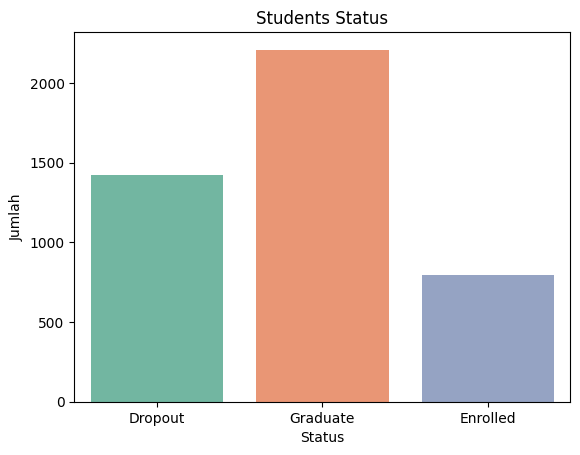

In [9]:
df['Status'].value_counts()
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Students Status')
plt.ylabel('Jumlah')
plt.show()

Jika dilihat data visualisasi, siswa yang berstatus Dropout terbanyak kedua dari total siswa

C:\Users\Asus\AppData\Local\Temp\ipykernel_1532\3796947483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fathers_qualification', order=df['Fathers_qualification'].value_counts().index, palette='Greens')


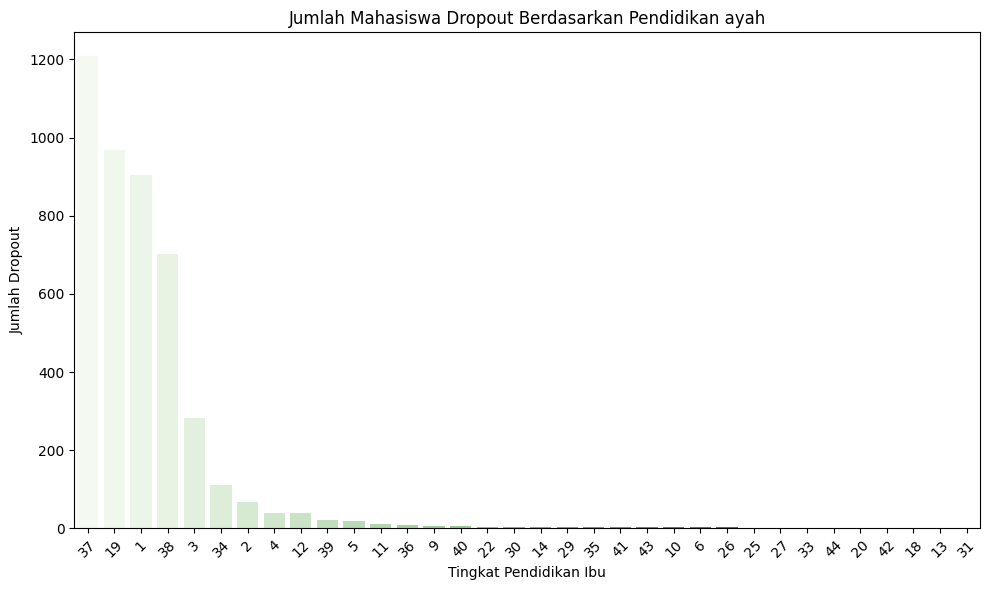

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fathers_qualification', order=df['Fathers_qualification'].value_counts().index, palette='Greens')
plt.title('Jumlah Mahasiswa Dropout Berdasarkan Pendidikan ayah')
plt.xlabel('Tingkat Pendidikan Ibu')
plt.ylabel('Jumlah Dropout')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

hasil dari visualisasi diatas menyatakan bahwa kebanyakan anak Dropout berasal dari pendidikan ayah yang kurang baik. bisa dilihat dari 3 besar yang tertinggi hanya sampai penddidikan dasar siklus 1, kemudian yang ke 2 hanya sampai lulus sma kelas 12, dan ketiga pendidikan dasar siklus 3

C:\Users\Asus\AppData\Local\Temp\ipykernel_1532\4145809157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Mothers_qualification', order=df['Mothers_qualification'].value_counts().index, palette='Reds')


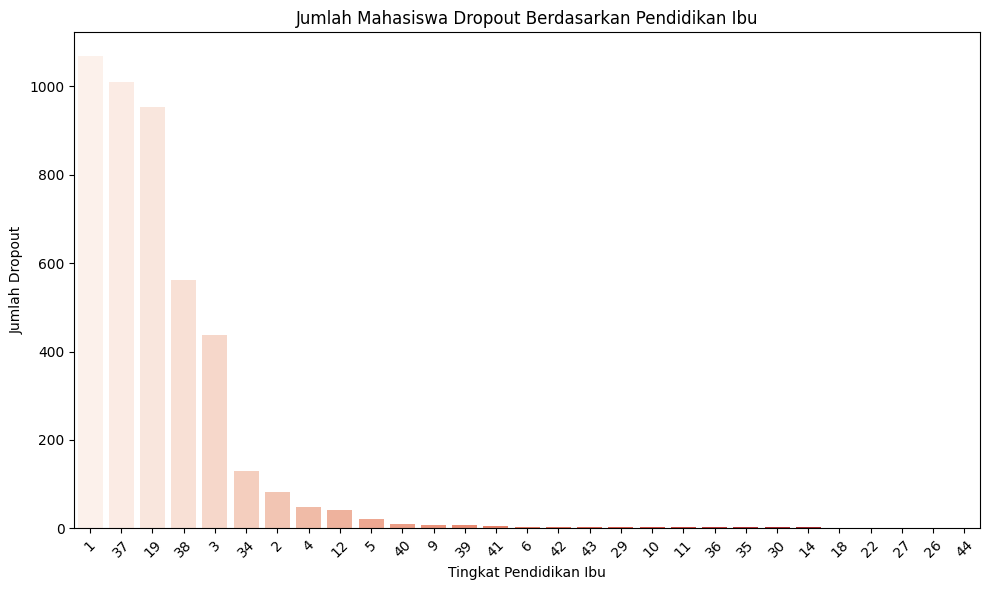

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mothers_qualification', order=df['Mothers_qualification'].value_counts().index, palette='Reds')
plt.title('Jumlah Mahasiswa Dropout Berdasarkan Pendidikan Ibu')
plt.xlabel('Tingkat Pendidikan Ibu')
plt.ylabel('Jumlah Dropout')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Begitupun dari tingkat pendidikan ibu, hasilnya benar benar mirip dengan total siswa DO berdasarkan pendidikan ayah

C:\Users\Asus\AppData\Local\Temp\ipykernel_1532\4165607918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fathers_occupation', order=df['Fathers_occupation'].value_counts().index, palette='Greens')


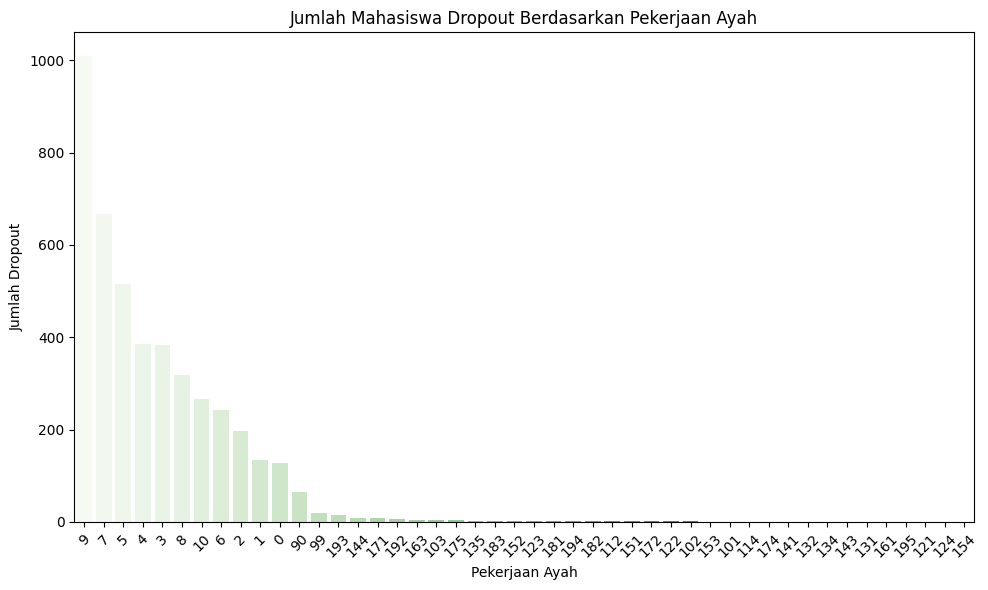

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fathers_occupation', order=df['Fathers_occupation'].value_counts().index, palette='Greens')
plt.title('Jumlah Mahasiswa Dropout Berdasarkan Pekerjaan Ayah')
plt.xlabel('Pekerjaan Ayah')
plt.ylabel('Jumlah Dropout')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bisa terlihat dari visualisasi diatas berdasarkan pekerjaan ayah siswa yang dropout kebanyakan ayahnya seorang yang bekerja sebagai pekerja tidak terampil

C:\Users\Asus\AppData\Local\Temp\ipykernel_1532\1482884138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Mothers_occupation', order=df['Mothers_occupation'].value_counts().index, palette='Reds')


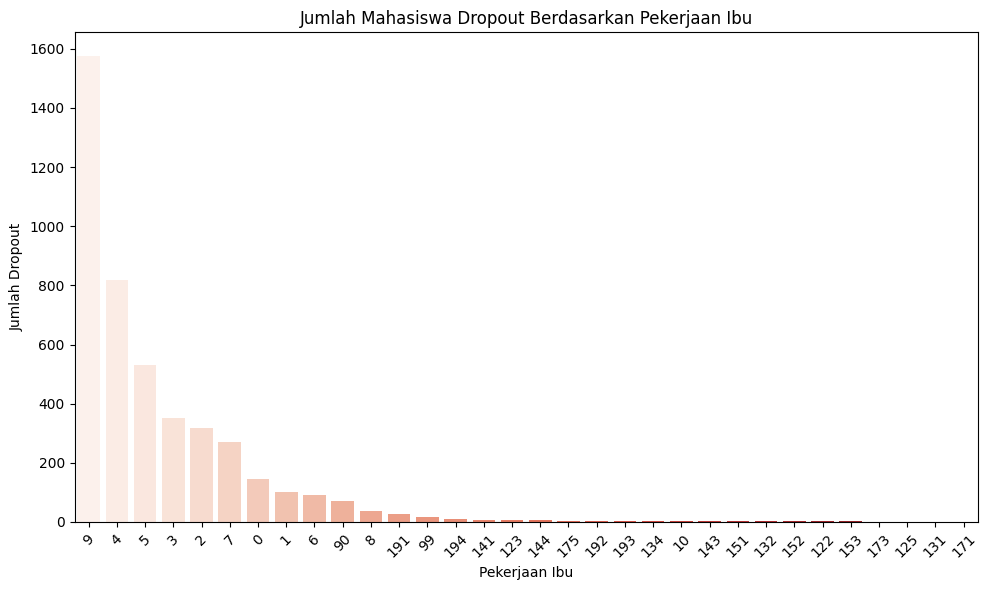

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mothers_occupation', order=df['Mothers_occupation'].value_counts().index, palette='Reds')
plt.title('Jumlah Mahasiswa Dropout Berdasarkan Pekerjaan Ibu')
plt.xlabel('Pekerjaan Ibu')
plt.ylabel('Jumlah Dropout')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

begitupun Berdasarkan pekerjaan ibu, Tertinggi nya juga bekerja sebagai pekerja tidak terampil

C:\Users\Asus\AppData\Local\Temp\ipykernel_1532\1396676015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Application_mode', order=df['Application_mode'].value_counts().index, palette='Purples')


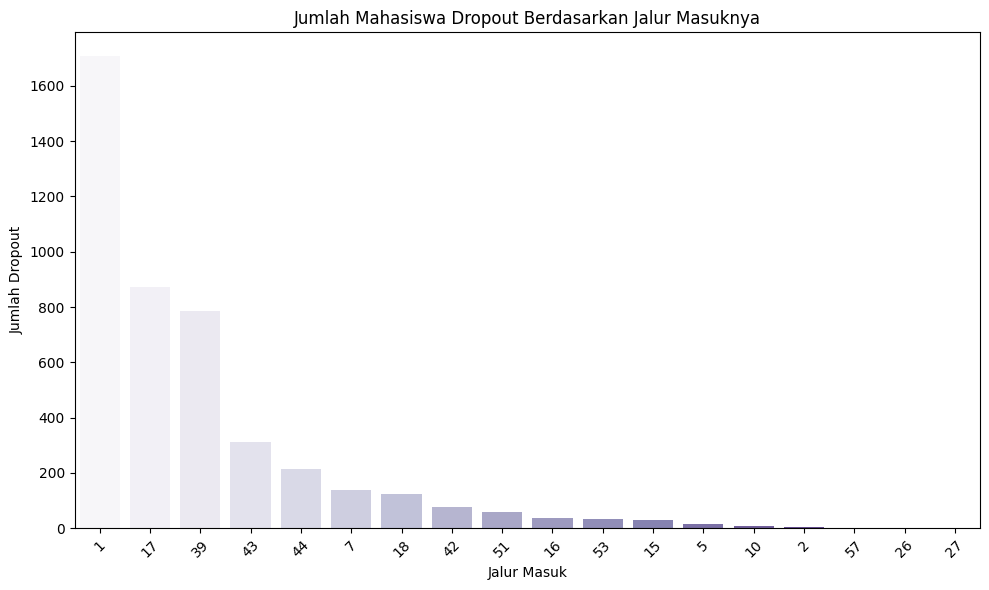

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Application_mode', order=df['Application_mode'].value_counts().index, palette='Purples')
plt.title('Jumlah Mahasiswa Dropout Berdasarkan Jalur Masuknya')
plt.xlabel('Jalur Masuk')
plt.ylabel('Jumlah Dropout')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

dari visualisasi diatas kita bisa melihat bahwa anak anak yang dropout kebanyakan daftar melalui jalur umum pada fase pertama dan fase kedua

     Status  Tuition_fees_up_to_date  Jumlah
0   Dropout                        0     457
1   Dropout                        1     964
2  Enrolled                        0      42
3  Enrolled                        1     752
4  Graduate                        0      29
5  Graduate                        1    2180


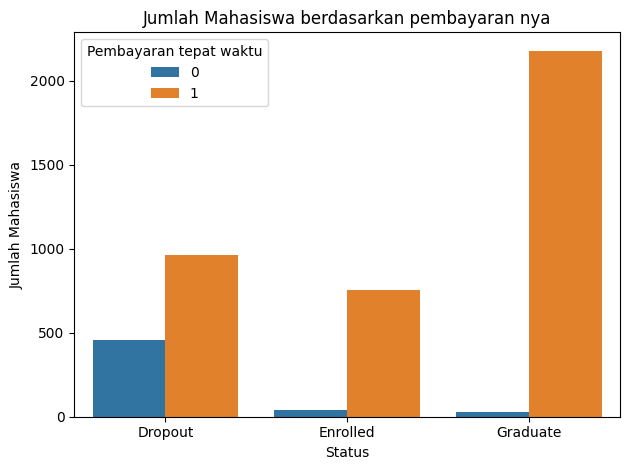

In [15]:
grouped_pay= df.groupby(['Status', 'Tuition_fees_up_to_date']).size().reset_index(name='Jumlah')
print(grouped_pay)

sns.barplot(data=grouped_pay, x='Status', y='Jumlah', hue='Tuition_fees_up_to_date')
plt.title('Jumlah Mahasiswa berdasarkan pembayaran nya')
plt.ylabel('Jumlah Mahasiswa')
plt.xlabel('Status')
plt.legend(title='Pembayaran tepat waktu')
plt.tight_layout()
plt.show()

kita bisa lihat, bahwa kebanyakan yang dropout juga tidak melakukan pembayaran tepat waktu

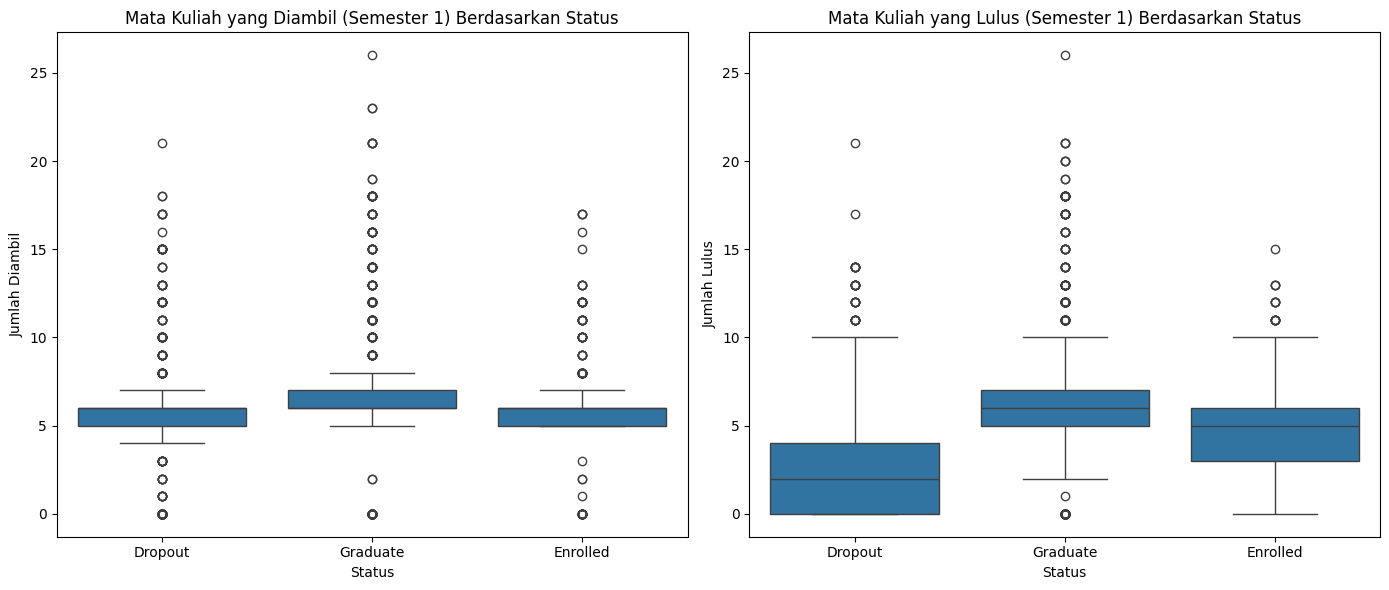

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Status', y='Curricular_units_1st_sem_enrolled', data=df, ax=axes[0])
axes[0].set_title("Mata Kuliah yang Diambil (Semester 1) Berdasarkan Status")
axes[0].set_ylabel("Jumlah Diambil")
axes[0].set_xlabel("Status")

sns.boxplot(x='Status', y='Curricular_units_1st_sem_approved', data=df, ax=axes[1])
axes[1].set_title("Mata Kuliah yang Lulus (Semester 1) Berdasarkan Status")
axes[1].set_ylabel("Jumlah Lulus")
axes[1].set_xlabel("Status")

plt.tight_layout()
plt.show()

mahasiswa yang Dropout terlihat pada visualisasi diatas menjadi yang paling sedikit lulus pada mata kuliah semester 1, padahal jika dilihat dari jumlah matakuliah yang diambil tidak berbeda jauh dengan mahasiswa di status lainnya

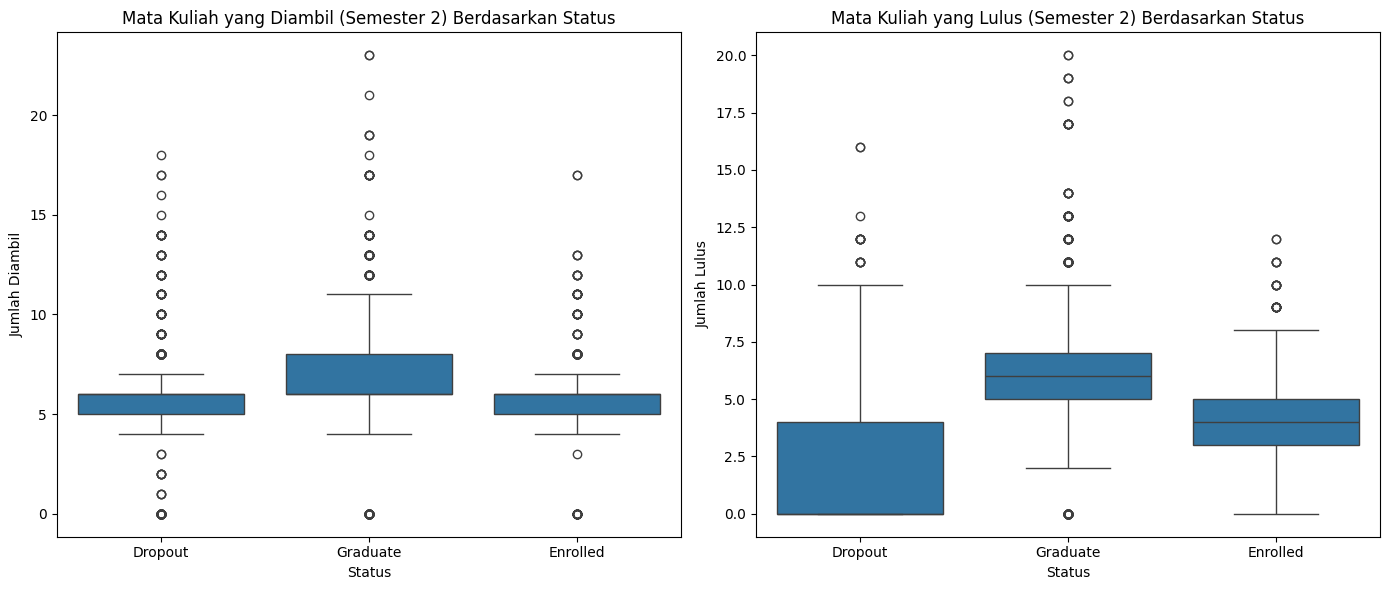

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Status', y='Curricular_units_2nd_sem_enrolled', data=df, ax=axes[0])
axes[0].set_title("Mata Kuliah yang Diambil (Semester 2) Berdasarkan Status")
axes[0].set_ylabel("Jumlah Diambil")
axes[0].set_xlabel("Status")

sns.boxplot(x='Status', y='Curricular_units_2nd_sem_approved', data=df, ax=axes[1])
axes[1].set_title("Mata Kuliah yang Lulus (Semester 2) Berdasarkan Status")
axes[1].set_ylabel("Jumlah Lulus")
axes[1].set_xlabel("Status")

plt.tight_layout()
plt.show()

Begitupun di semester 2, banyak mahasiswa yang di dropout tidak lulus dalam matakuliahnya ini dapat dilihat dalam perbandingan visualisasi diatas antara mata kuliah yang diambil dan mata kuliah yang lulusnya

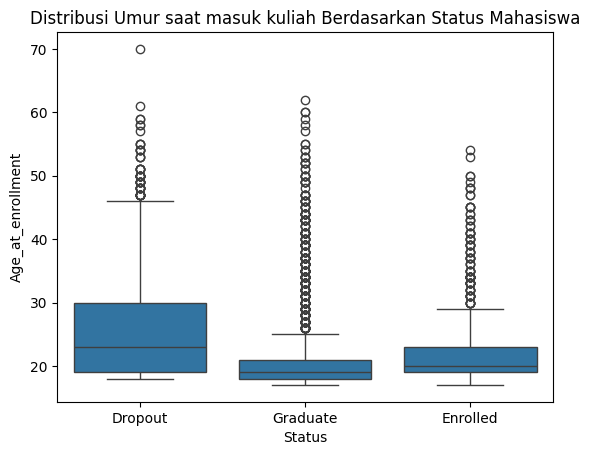

In [18]:
sns.boxplot(x='Status', y='Age_at_enrollment', data=df)
plt.title("Distribusi Umur saat masuk kuliah Berdasarkan Status Mahasiswa")
plt.show()

Jika Dilihat dari segi umur mahasiswa DO kebanyakan memiliki umur yang lebih tua dari mahasiswa status lainnya

In [19]:
cleaned_df = df[['Status',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_enrolled',
    'Tuition_fees_up_to_date',
    'Curricular_units_2nd_sem_enrolled'	,
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_evaluations']]
cleaned_df.head()

,Status,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_approved,Curricular_units_1st_sem_enrolled,Tuition_fees_up_to_date,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_evaluations
0,Dropout,20,0,0,0,1,0,0,0.000000,0.000000,0
1,Graduate,19,6,6,6,0,6,6,14.000000,13.666667,6
2,Dropout,19,0,0,6,0,6,0,0.000000,0.000000,0
3,Graduate,20,6,5,6,1,6,8,13.428571,12.400000,10
4,Graduate,45,5,6,6,1,6,9,12.333333,13.000000,6


memillih beberapa kolom yang berkemungkinan kita pakai kedepannya

In [20]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)


X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (3539, 36)
X_test : (885, 36)
y_train: (3539,)
y_test : (885,)


membagi data antara data taraining 80% dan testing 20%

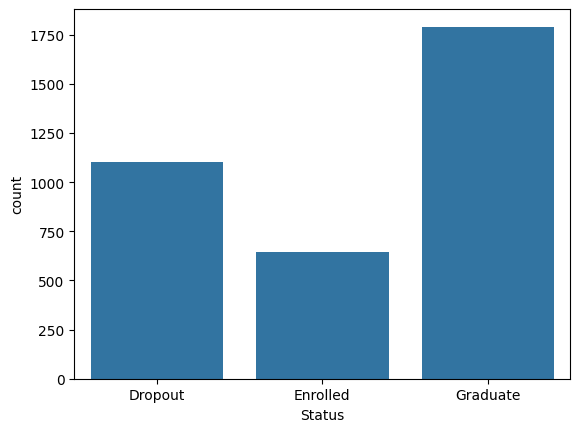

In [21]:
train_df = pd.concat([X_train, y_train], axis=1)

sns.countplot(data=train_df, x="Status")
plt.show()

disini kita melihat sample yang tidak balance, sehingga kita harus menyetarakan data di setiap label nya

In [22]:
train_df.Status.value_counts()

Status
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64

kita bisa lihat data pada status enrolled nya paling sedikit

In [23]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]

df_majority_1_undersampled = resample(df_majority_1, n_samples=643, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=643, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(643, 37)
(643, 37)


Disini kita melakukan undersampling, Dimana kita menyetarakan jumlah data pada label nya menjadi yang paling sedikit diantara label

In [24]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
1834,1,1,3,9147,1,1,131.0,1,19,38,...,0,5,8,4,11.250000,0,9.4,-0.8,-3.12,Enrolled
1302,1,17,1,9670,1,1,115.0,1,1,1,...,0,6,9,5,14.600000,0,12.4,0.5,1.79,Enrolled
1430,1,1,1,9085,1,1,154.0,1,38,37,...,0,6,9,6,14.857143,0,11.1,0.6,2.02,Graduate
655,1,1,1,9853,1,1,133.1,1,19,19,...,0,6,9,3,11.000000,0,12.7,3.7,-1.70,Dropout
1275,1,43,1,9991,0,1,120.0,1,19,37,...,0,5,10,1,11.000000,0,13.9,-0.3,0.79,Dropout


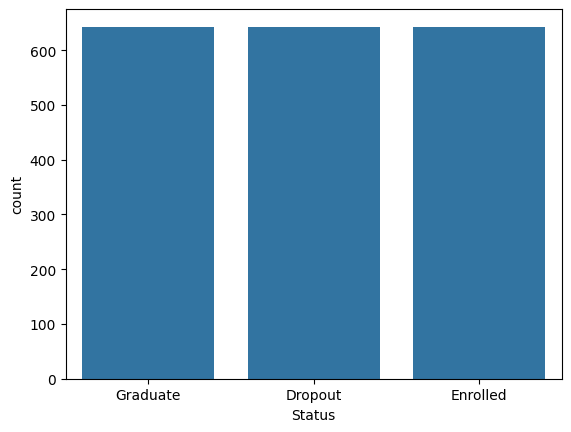

In [25]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

ini hasil data yang telah di undersampling

In [26]:
os.makedirs("model", exist_ok=True)

def scaling(features, df, df_test=None):
    df = df.copy()
    if df_test is not None:
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asarray(df[feature]).reshape(-1, 1)
            scaler.fit(X)
            df[feature] = scaler.transform(X)
            joblib.dump(scaler, f"model/scaler_{feature}.joblib")

            X_test = np.asarray(df_test[feature]).reshape(-1, 1)
            df_test[feature] = scaler.transform(X_test)
        return df, df_test
    else:
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asarray(df[feature]).reshape(-1, 1)
            scaler.fit(X)
            df[feature] = scaler.transform(X)
            joblib.dump(scaler, f"model/scaler_{feature}.joblib")
        return df


numerical_columns_to_scale = [

    'Application_mode',
    'Mothers_qualification',
    'Fathers_qualification',
    'Age_at_enrollment',
    'Tuition_fees_up_to_date',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_enrolled'	,
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_evaluations'


]

X_train_scaled, X_test_scaled = scaling(numerical_columns_to_scale, X_train, X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
joblib.dump(label_encoder, "model/encoder_Status.joblib")



['model/encoder_Status.joblib']

Sebelum melakukan proses scaling dan encoding, terlebih dahulu kita pisahkan kolom status karena kolom ini merupakan data kategorikal yang akan digunakan sebagai target label pada proses modeling. Kolom status tidak akan dikenakan proses scaling karena bukan data numerik, namun tetap akan melalui proses encoding agar dapat diproses oleh algoritma machine learning.

## Modeling

GBOOST MODEL

In [27]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(X_train_scaled, y_train_encoded)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

kita menggunakan Hypertunning parameter yaitu grid search untuk mencari parameter mana yang terbaik untuk kita gunakan

In [28]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    max_features='sqrt',
    n_estimators=200
)
gboost_model.fit(X_train_scaled, y_train_encoded)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

Decision Tree Model

In [29]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train_scaled, y_train_encoded)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [30]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy',
    max_depth=7,
    max_features='sqrt'
)

tree_model.fit(X_train_scaled, y_train_encoded)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

Random Forest Model

In [31]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train_scaled, y_train_encoded)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [32]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [33]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(X_train_scaled, y_train_encoded)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Evaluation

In [34]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Dropout', 'Enrolled']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

              precision    recall  f1-score   support

     Dropout       0.84      0.77      0.80       316
    Enrolled       0.49      0.32      0.39       151
    Graduate       0.78      0.92      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



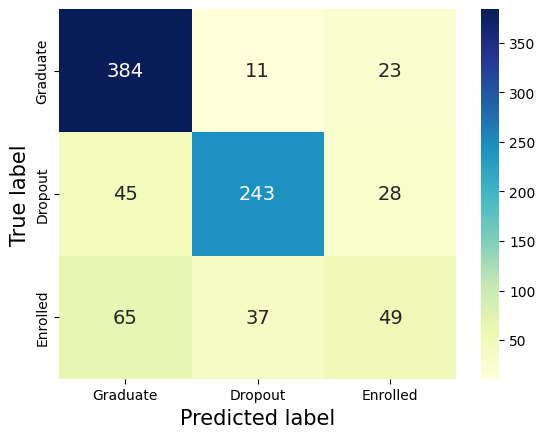

,Graduate,Dropout,Enrolled
Graduate,384,11,23
Dropout,45,243,28
Enrolled,65,37,49


In [35]:
y_pred_test = gboost_model.predict(X_test_scaled)
y_pred_test = label_encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

     Dropout       0.77      0.64      0.70       316
    Enrolled       0.34      0.26      0.30       151
    Graduate       0.73      0.88      0.80       418

    accuracy                           0.69       885
   macro avg       0.61      0.59      0.60       885
weighted avg       0.68      0.69      0.68       885



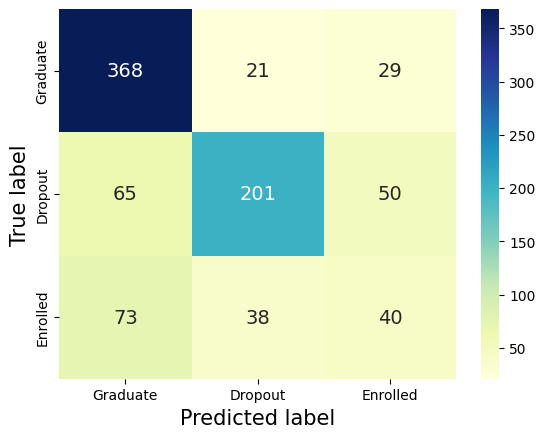

,Graduate,Dropout,Enrolled
Graduate,368,21,29
Dropout,65,201,50
Enrolled,73,38,40


In [36]:
y_pred_test = tree_model.predict(X_test_scaled)
y_pred_test = label_encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

     Dropout       0.84      0.75      0.79       316
    Enrolled       0.52      0.25      0.33       151
    Graduate       0.75      0.95      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.65      0.65       885
weighted avg       0.74      0.76      0.73       885



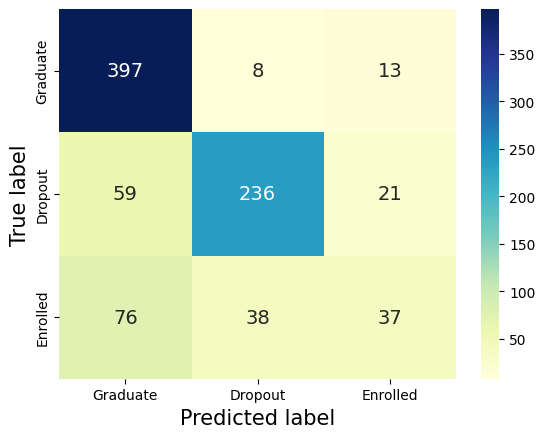

,Graduate,Dropout,Enrolled
Graduate,397,8,13
Dropout,59,236,21
Enrolled,76,38,37


In [37]:
y_pred_test = rdf_model.predict(X_test_scaled)

y_pred_test = label_encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

Dari Hasil evaluasi diatas kita mendapatkan model dari GBoost mendapatkan accuracy yang paling tinggi diantara 3 model yang lainnya dengan accuracy 78%.